In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [3]:
customer_df = pd.read_csv('customers.csv')
customer_df.columns


Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [4]:
customer_df.dtypes


ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [5]:
customer_df.shape


(10695, 11)

In [7]:
customer_df.isnull().sum()
customer_df_cleaned = customer_df.dropna(axis = 0)
customer_df_cleaned.isnull().sum()
customer_df_cleaned.shape
customer_df_cleaned.dtypes
customer_df_cleaned['Gender'].unique()
customer_df_cleaned['Ever_Married'].unique()
customer_df_cleaned['Graduated'].unique()
customer_df_cleaned['Profession'].unique()
customer_df_cleaned['Spending_Score'].unique()
customer_df_cleaned['Var_1'].unique()
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [8]:
categories_list = [['Male', 'Female'],
                   ['No', 'Yes'],
                   ['No', 'Yes'],
                   ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor', 'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
                   ['Low', 'Average', 'High']]
enc = OrdinalEncoder(categories = categories_list)

In [9]:

customers_1 = customer_df_cleaned.copy()
customers_1[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']] = enc.fit_transform(customers_1[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']])
customers_1.dtypes


ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [10]:
le = LabelEncoder()
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [11]:
customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

<Axes: >

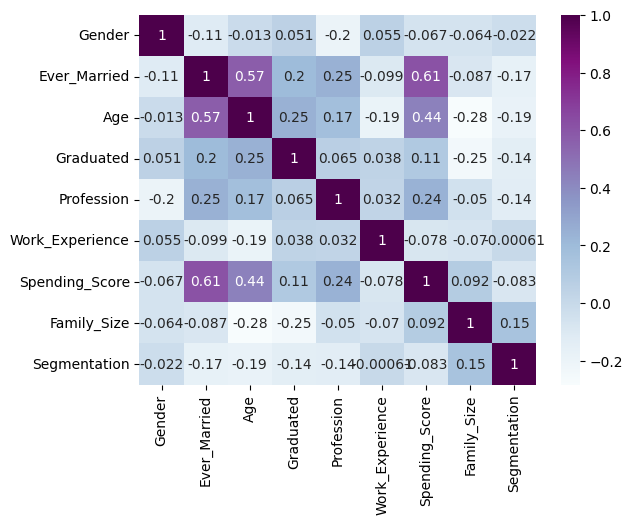

In [12]:
corr = customers_1.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

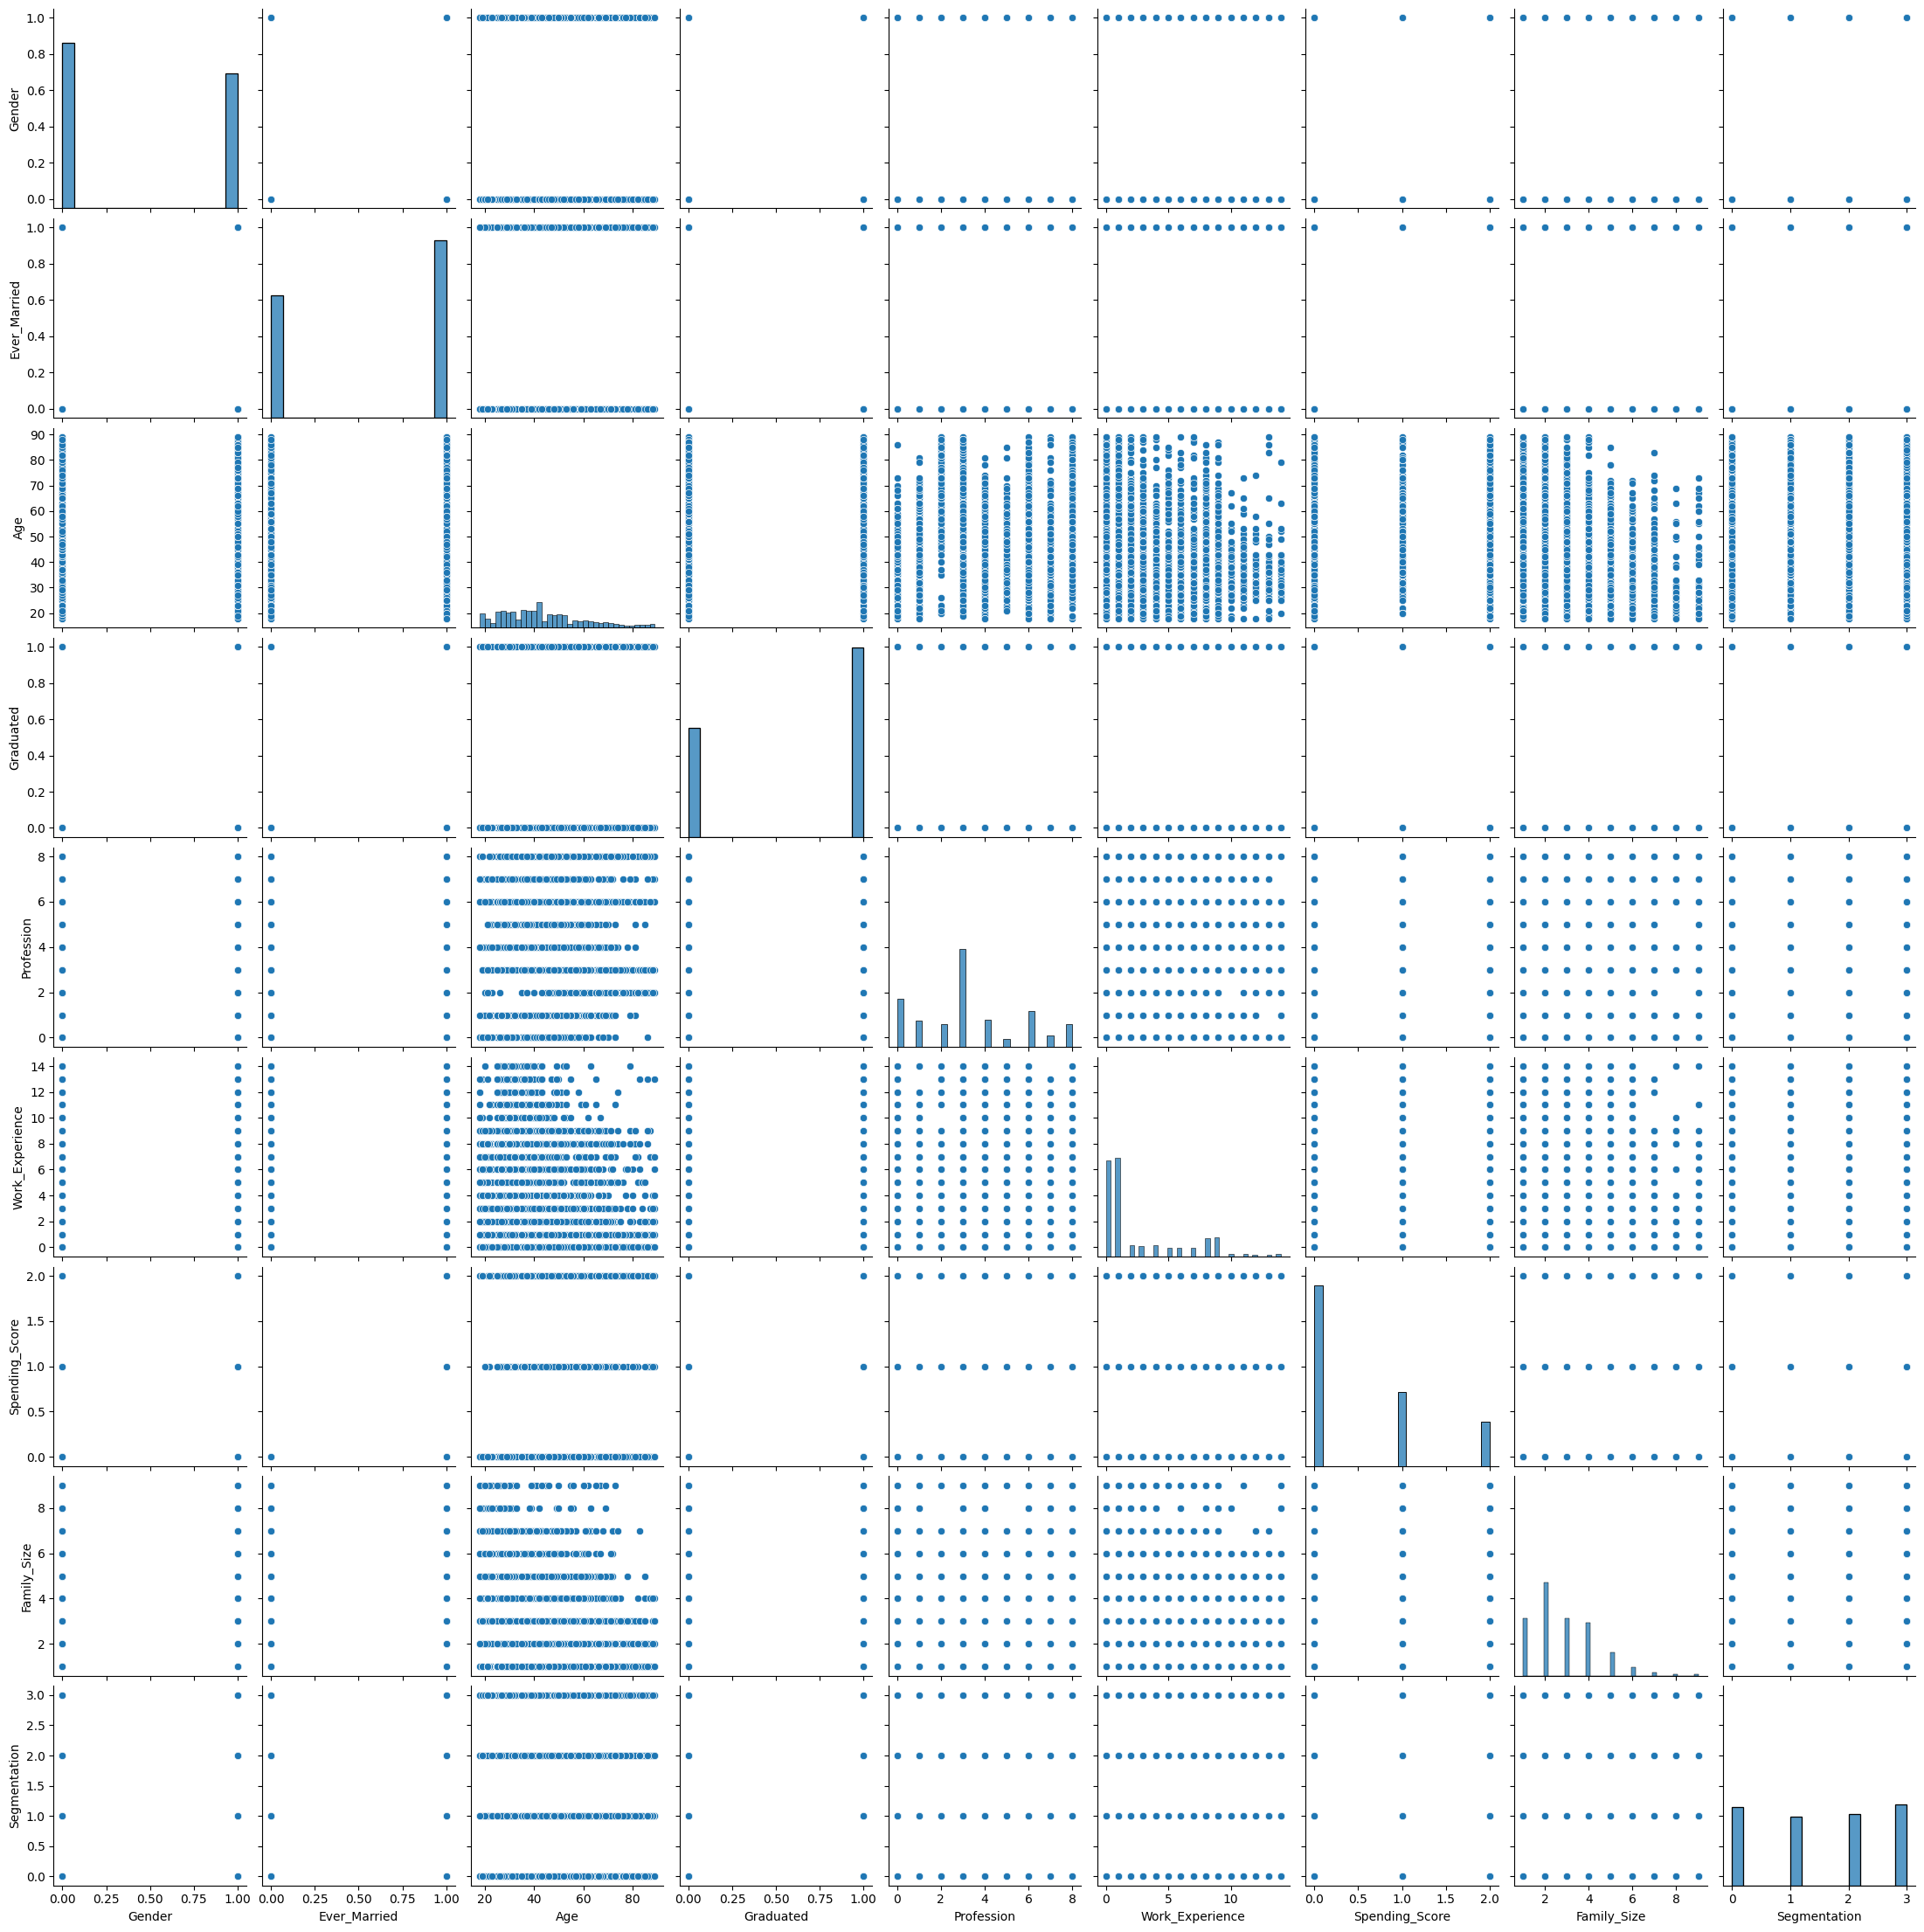

In [13]:
sns.pairplot(customers_1)


<ipython-input-14-3205c74fe7af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers_1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

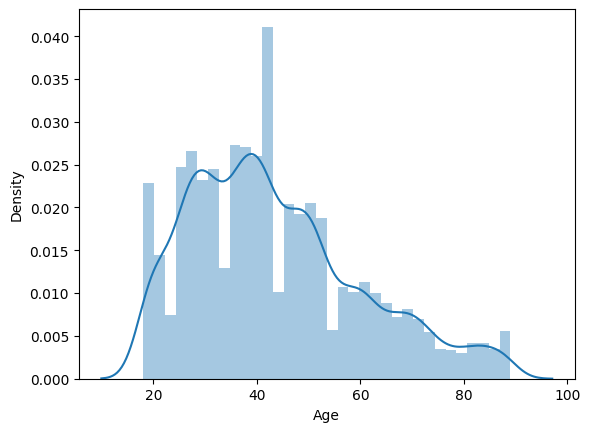

In [14]:
sns.distplot(customers_1['Age'])


<Axes: ylabel='count'>

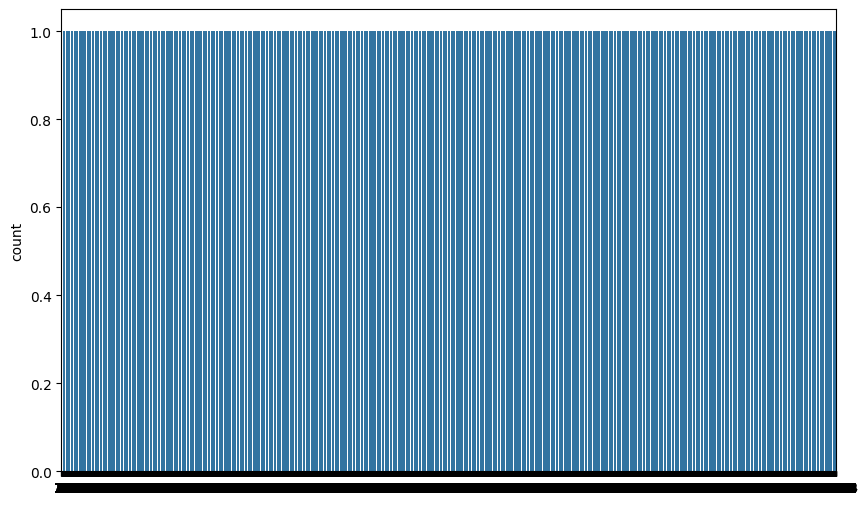

In [15]:

plt.figure(figsize=(10,6))
sns.countplot(customers_1['Family_Size'])


<Axes: xlabel='Family_Size', ylabel='Age'>

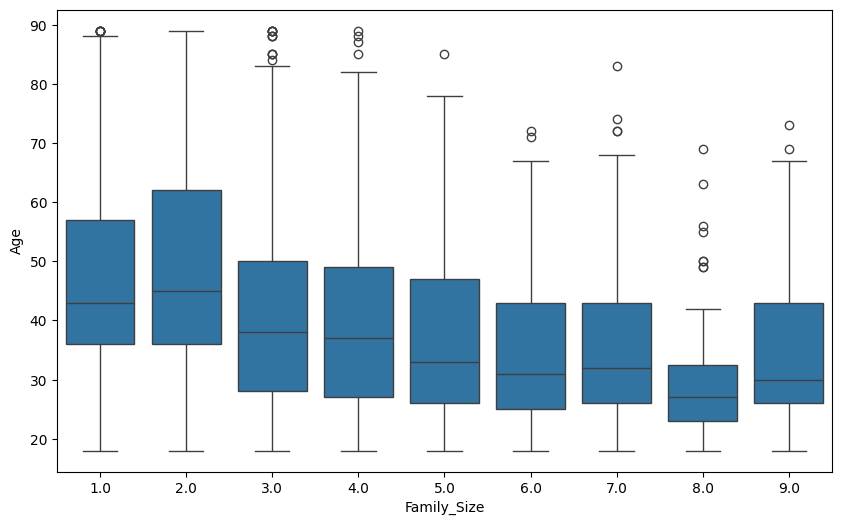

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=customers_1)

<Axes: xlabel='Family_Size', ylabel='Spending_Score'>

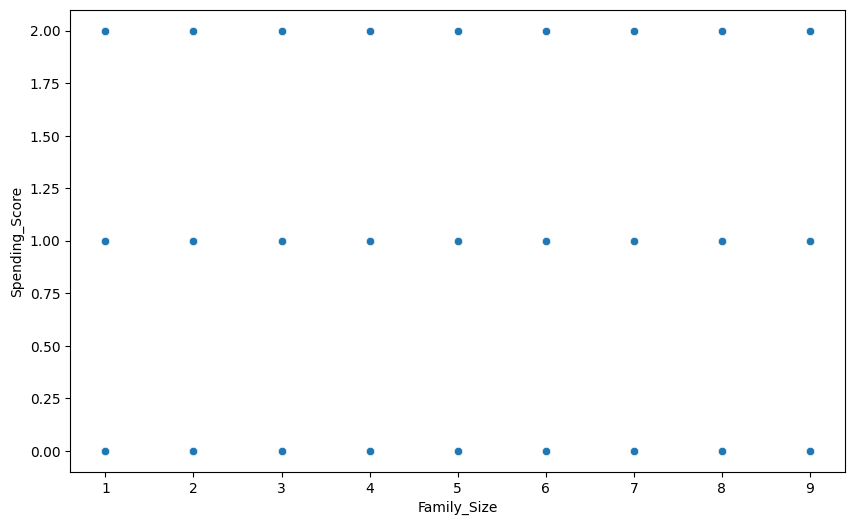

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=customers_1)

<Axes: xlabel='Family_Size', ylabel='Age'>

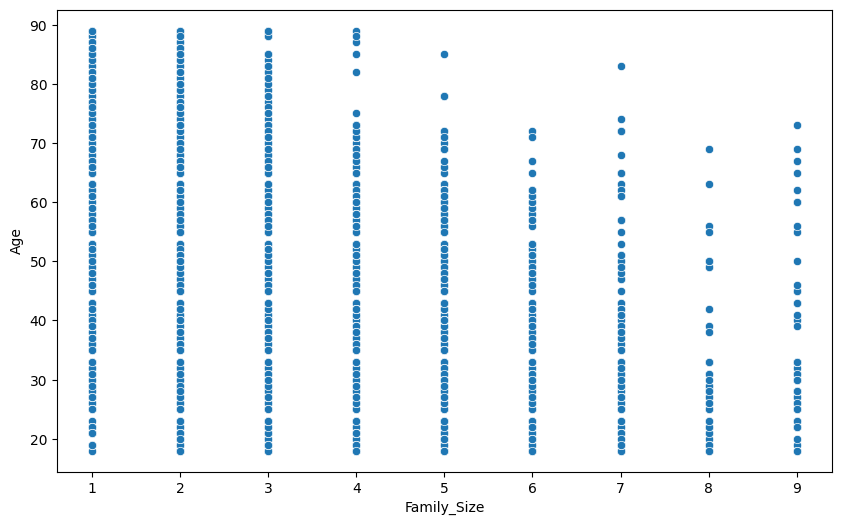

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=customers_1)

In [19]:

customers_1.describe()



,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [20]:
customers_1['Segmentation'].unique()


array([3, 1, 2, 0])

In [21]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values


In [22]:
y1 = customers_1[['Segmentation']].values


In [23]:
one_hot_enc = OneHotEncoder()


In [24]:
one_hot_enc.fit(y1)


OneHotEncoder()

In [25]:

y1.shape



(8819, 1)

In [26]:
y = one_hot_enc.transform(y1).toarray()
y.shape

(8819, 4)

In [27]:
y1[0]

array([3])

In [28]:
y[0]

array([0., 0., 0., 1.])

In [29]:
X.shape

(8819, 8)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [31]:
X_train.shape


(5908, 8)

In [32]:
scaler_age = MinMaxScaler()


In [33]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [35]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)


In [36]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [37]:
ai_brain = Sequential([
  Dense(4,input_shape=(8,)),
  Dense(10,activation='relu'),
  Dense(6,activation='relu'),
  Dense(4,activation='softmax'),
])

In [38]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [39]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs= 2500,
             batch_size= 250,
             validation_data=(X_test_scaled,y_test),
             )

Streaming output truncated to the last 5000 lines.
24/24 [==============================] - 1s 8ms/step - loss: 1.5392 - accuracy: 0.2470 - val_loss: 1.4463 - val_accuracy: 0.2484
Epoch 2/2500
24/24 [==============================] - 0s 3ms/step - loss: 1.4176 - accuracy: 0.2791 - val_loss: 1.3928 - val_accuracy: 0.3009
Epoch 3/2500
24/24 [==============================] - 0s 3ms/step - loss: 1.3870 - accuracy: 0.3026 - val_loss: 1.3788 - val_accuracy: 0.3105
Epoch 4/2500
24/24 [==============================] - 0s 3ms/step - loss: 1.3763 - accuracy: 0.3507 - val_loss: 1.3687 - val_accuracy: 0.3738
Epoch 5/2500
24/24 [==============================] - 0s 2ms/step - loss: 1.3643 - accuracy: 0.3835 - val_loss: 1.3552 - val_accuracy: 0.3813
Epoch 6/2500
24/24 [==============================] - 0s 3ms/step - loss: 1.3473 - accuracy: 0.3888 - val_loss: 1.3408 - val_accuracy: 0.3748
Epoch 7/2500
24/24 [==============================] - 0s 2ms/step - loss: 1.3320 - accuracy: 0.3891 - val_loss

In [40]:
metrics = pd.DataFrame(ai_brain.history.history)



In [41]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,1.539237,0.246953,1.446273,0.248368
1,1.417554,0.279113,1.392754,0.300928
2,1.387024,0.302640,1.378774,0.310546
3,1.376331,0.350711,1.368729,0.373755
4,1.364252,0.383548,1.355233,0.381312


<Axes: >

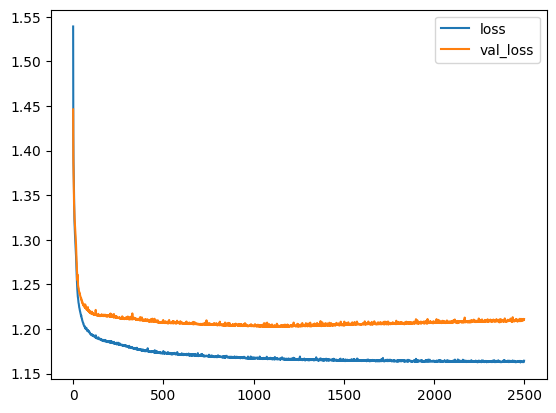

In [42]:
metrics[['loss','val_loss']].plot()

In [43]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)


91/91 [==============================] - 0s 1ms/step


In [47]:
x_test_predictions.shape




(2911,)

In [48]:
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shape

(2911,)

In [49]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))


[[383  57 111 206]
 [267  82 224 113]
 [157  73 354 102]
 [188  33  59 502]]


In [50]:
print(classification_report(y_test_truevalue,x_test_predictions))


              precision    recall  f1-score   support

           0       0.38      0.51      0.44       757
           1       0.33      0.12      0.18       686
           2       0.47      0.52      0.49       686
           3       0.54      0.64      0.59       782

    accuracy                           0.45      2911
   macro avg       0.43      0.45      0.42      2911
weighted avg       0.44      0.45      0.43      2911



In [51]:
ai_brain.save('customer_classification_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
with open('customer_data.pickle', 'wb') as fh:
  pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)


In [53]:
ai_brain = load_model('customer_classification_model.h5')


In [54]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [55]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))

1/1 [==============================] - 0s 64ms/step
[2]
['C']
